# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
%tb

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


No traceback available to show.


In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils

In [4]:
loader = Loader(dataDir, 'inD')

In [5]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True, precomputeSceneData=False)

INFO:root:recordingIds: [25]
INFO:root:Downsampling recording 25 from 25.0 to 2.5
downsampling: 100%|█████████████████████████████████████████████████████████| 672514/672514 [00:42<00:00, 15969.22it/s]


In [6]:
sceneId = 21
sceneConfig = {
      "centerXPixel": 302.5,
      "centerYPixel": 345.5,
      "centerX": 29.57,
      "centerY": -33.77,
      "angle": 16.0,
      "roadWidth": 9.0,
      "boxWidth": 15.0
    }
boxWidth = sceneConfig["boxWidth"]
roadWidth = sceneConfig["roadWidth"]
pedData = loc2data.getSceneCrossingDf(sceneId, boxWidth, roadWidth)
pedData.groupby(["uniqueTrackId"]).count()

crossing recording: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:27<00:00, 27.92s/it]


,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,sceneId,roadWidth
uniqueTrackId,,,,,,,,,,,,,,,,,,,,
25117,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
25288,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
25300,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
25445,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
25472,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97


In [7]:
otherData = loc2data.getSceneOtherDf(sceneId)

other recording: 100%|███████████████████████████████████████████████████████████████████| 1/1 [01:08<00:00, 68.87s/it]


In [23]:
from extractors.SceneData import SceneData
sceneData = SceneData(
    2,
    0.00814636091724502,
    sceneId,
    sceneConfig,
    boxWidth,
    roadWidth,
    pedData=pedData,
    otherData=otherData,
    backgroundImagePath="G:AV datasets/inD-dataset-v1.0/data/18_background.png"
)

sceneData.buildLocalInformation()

INFO:root:clipping trajectories with scene polygon POLYGON ((38.57110553234789 -37.95092085497159, 34.9878199067269 -25.45451880777344, 20.56889446765211 -29.58907914502843, 24.1521800932731 -42.08548119222657, 38.57110553234789 -37.95092085497159))
clipping ped trajectories for scene # 21 with width offset 4.0: 100%|████████████████████| 5/5 [00:00<00:00, 68.49it/s]
clipping other trajectories for scene # 21: 100%|████████████████████████████████████| 205/205 [00:02<00:00, 88.06it/s]
INFO:root:adding pedestrian local dynamics for scene 21
deriving velocity on sceneY at fps 2.5: 100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 312.42it/s]
deriving acceleration on sceneXVelocity at fps 2.5: 100%|███████████████████████████████| 5/5 [00:00<00:00, 294.12it/s]
deriving acceleration on sceneYVelocity at fps 2.5: 100%|███████████████████████████████| 5/5 [00:00<00:00, 311.77it/s]
INFO:root:adding other local dynamics for scene 21
deriving velocity on sceneY at fps 2.5: 100

In [24]:
trackId = 25117
localPedData = sceneData.getPedDataInSceneCoordinates()
localPedData[localPedData["uniqueTrackId"]==trackId]

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,5535,25,117,5836,200,24.16246,-41.01131,18.36457,0.0,0.0,...,-0.25688,25117,21,9.0,-7.194037,-5.470274,-1.556653,-0.101042,0.000000,0.000000
1,5536,25,117,5846,210,24.74986,-40.80083,17.73509,0.0,0.0,...,-0.27000,25117,21,9.0,-6.571375,-5.429857,-1.556653,-0.101042,0.000000,0.000000
2,5537,25,117,5856,220,25.27104,-40.62234,16.64931,0.0,0.0,...,-0.22720,25117,21,9.0,-6.021186,-5.401938,-1.375472,-0.069797,-0.452952,-0.078113
3,5538,25,117,5866,230,25.73915,-40.47585,15.24901,0.0,0.0,...,-0.17929,25117,21,9.0,-5.530832,-5.390151,-1.225886,-0.029467,-0.373966,-0.100827
4,5539,25,117,5876,240,26.21445,-40.37038,13.74832,0.0,0.0,...,-0.08910,25117,21,9.0,-5.044873,-5.419778,-1.214898,0.074065,-0.027470,-0.258830
5,5540,25,117,5886,250,26.69321,-40.26330,12.33464,0.0,0.0,...,-0.09684,25117,21,9.0,-4.555144,-5.448810,-1.224322,0.072581,0.023561,0.003712
6,5541,25,117,5896,260,27.17606,-40.17788,11.13797,0.0,0.0,...,-0.07073,25117,21,9.0,-4.067454,-5.499790,-1.219225,0.127451,-0.012742,-0.137177
7,5542,25,117,5906,270,27.65933,-40.11221,10.25612,0.0,0.0,...,0.00228,25117,21,9.0,-3.584804,-5.569872,-1.206625,0.175203,-0.031501,-0.119379
8,5543,25,117,5916,280,28.13546,-40.03324,9.68951,0.0,0.0,...,0.02014,25117,21,9.0,-3.105351,-5.625200,-1.198632,0.138321,-0.019984,0.092205
9,5544,25,117,5926,290,28.62614,-39.96400,9.36712,0.0,0.0,...,0.07890,25117,21,9.0,-2.614594,-5.693892,-1.226893,0.171730,0.070653,-0.083522


In [18]:
# pedData[(pedData["uniqueTrackId"]==trackId)]

In [19]:

# pedData.groupby(["uniqueTrackId"]).count()

In [20]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [21]:
sceneData.sceneConfig
sceneData.orthoPxToMeter

0.00814636091724502

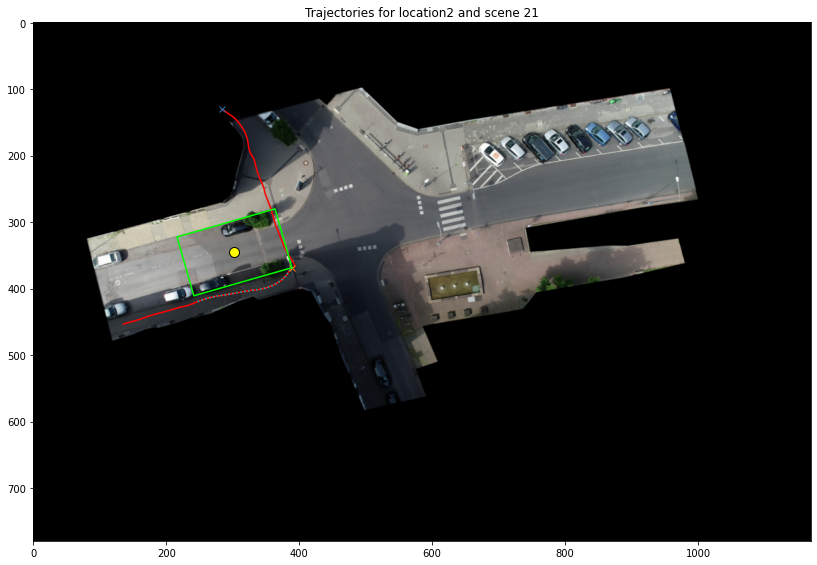

In [25]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, ids=[25117])